#### today project started date : 25th june 2025

In [1]:
import os
import cv2
import numpy as np

def resize_with_padding(img, target_size=256):
    h, w = img.shape[:2]
    scale = target_size / max(h, w)
    resized_img = cv2.resize(img, (int(w * scale), int(h * scale)))
    top = bottom = (target_size - resized_img.shape[0]) // 2
    left = right = (target_size - resized_img.shape[1]) // 2
    top += (target_size - resized_img.shape[0]) % 2
    left += (target_size - resized_img.shape[1]) % 2
    padded_img = cv2.copyMakeBorder(
        resized_img, top, bottom, left, right,
        borderType=cv2.BORDER_CONSTANT, value=[0, 0, 0]
    )
    return padded_img

def resize_images_in_folder(input_folder, output_folder, target_size=256):
    os.makedirs(output_folder, exist_ok=True)
    for class_name in os.listdir(input_folder):
        class_path = os.path.join(input_folder, class_name)
        if not os.path.isdir(class_path):
            continue
        output_class_path = os.path.join(output_folder, class_name)
        os.makedirs(output_class_path, exist_ok=True)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            if img is None:
                print(f"Skipping unreadable file: {img_path}")
                continue

            # Convert grayscale to RGB if needed
            if len(img.shape) == 2 or img.shape[2] == 1:
                img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

            padded_img = resize_with_padding(img, target_size)

            output_path = os.path.join(output_class_path, img_name)
            cv2.imwrite(output_path, padded_img)

        print(f"Processed class: {class_name}")

train_input = r'/home/petpooja/Documents/other projects/brain_tumor_project/brain_tumor/Training'
train_output =r'/home/petpooja/Documents/other projects/brain_tumor_project/brain_tumor/Training_resized'

test_input = r'/home/petpooja/Documents/other projects/brain_tumor_project/brain_tumor/Testing'
test_output =r'/home/petpooja/Documents/other projects/brain_tumor_project/brain_tumor/Testing_resized'

# Run the resizing
resize_images_in_folder(train_input, train_output)
resize_images_in_folder(test_input, test_output)


Processed class: notumor
Processed class: meningioma
Processed class: glioma
Processed class: pituitary
Processed class: notumor
Processed class: meningioma
Processed class: glioma
Processed class: pituitary


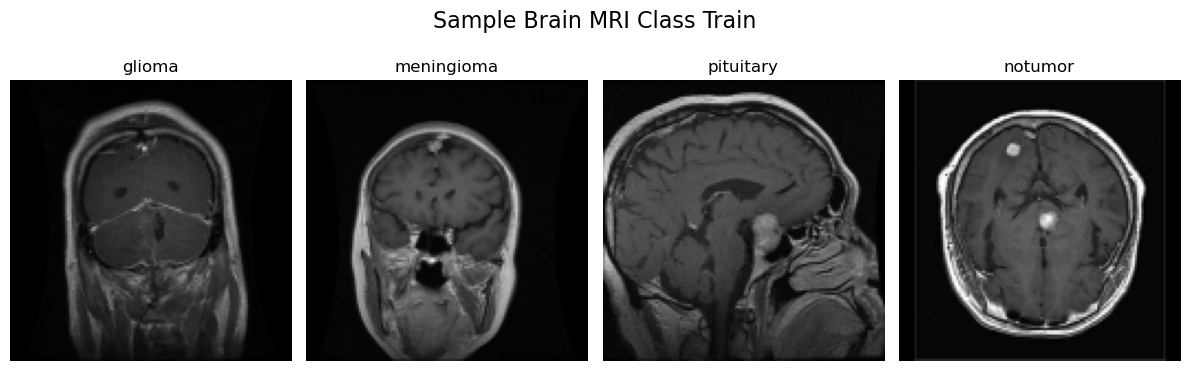

In [7]:
import os
import matplotlib.pyplot as plt
import cv2
dataset_path = r'/home/petpooja/Documents/other projects/brain_tumor_project/brain_tumor/Training_resized'

classes = ['glioma', 'meningioma', 'pituitary', 'notumor']
img_size = 128
plt.figure(figsize=(12, 4))
for i, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    img_files = os.listdir(class_path)
    img_path = os.path.join(class_path, img_files[0])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size, img_size))
    
    plt.subplot(1, 4, i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

plt.suptitle("Sample Brain MRI Class Train", fontsize=16)
plt.tight_layout()
plt.show()


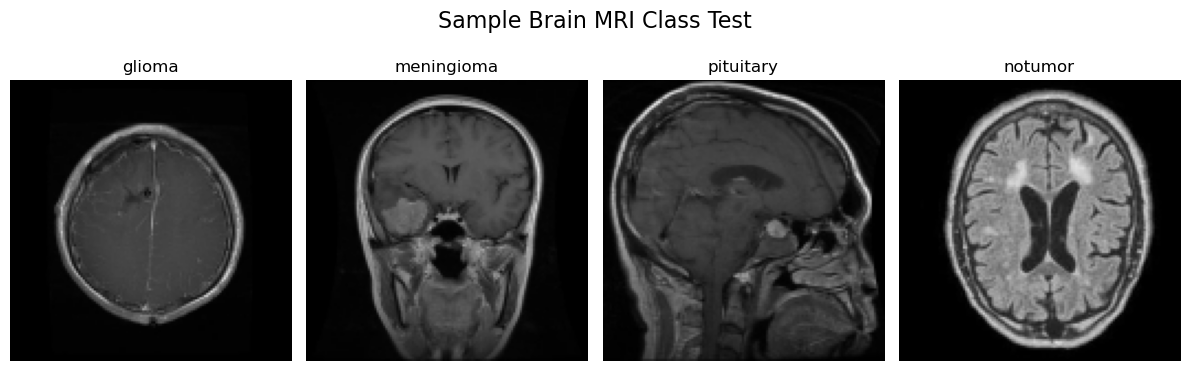

In [8]:
import os
import matplotlib.pyplot as plt
import cv2
dataset_path = r'/home/petpooja/Documents/other projects/brain_tumor_project/brain_tumor/Testing_resized'

classes = ['glioma', 'meningioma', 'pituitary', 'notumor']
img_size = 128
plt.figure(figsize=(12, 4))
for i, class_name in enumerate(classes):
    class_path = os.path.join(dataset_path, class_name)
    img_files = os.listdir(class_path)
    img_path = os.path.join(class_path, img_files[0])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size, img_size))
    
    plt.subplot(1, 4, i+1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

plt.suptitle("Sample Brain MRI Class Test", fontsize=16)
plt.tight_layout()
plt.show()


In [9]:
from tensorflow.keras.applications import DenseNet121,EfficientNetB2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D,BatchNormalization
from keras.layers import Dropout,GlobalAveragePooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import AdamW,Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print("all libraries are uploded")


all libraries are uploded


Found 5663 images belonging to 4 classes.
Class distribution: 8684


AxisError: axis 1 is out of bounds for array of dimension 1